Projet :

Vous devez créer un pipeline d'apprentissage automatique, basé sur les réseau de neurones, sur la tâche Visual Question Answering (VQA). Ceci comprend:*
- Creation d'un modèle
- Creation d'un dataloader
- Entraînement selon les splits
- Test sur le split de test
- Ecriture d'un rapport Scientifique

**Creation d'un modèle**

Les images sont de tailles 124x124. Les modèles classiques proposés par pytorch prennent en entrée des images de taille 224x224. <br/>
Nous voulons un modèle qui prennent en entrée les images de tailles 112x112.

Ce modèle encode l'image avec un CNN, et intègre la question dans le pipeline.

**Creation d'un dataloader**
  - sentence embedding (lente forward pass, il est judicieux de calculer cette représentation que une fois sachant que le modèle est pré-entrainé (et fixé).
  - il faut passer d'image 124x124 en 112x112, ceci permet de faire de la data-augementation (randomresizecrop, randomflip, ...)
  - Le data loader retourne, au moins, la question, l'image et le label

**Entraînement selon les splits**

Il faut créer une procédure d'entrainement et selectionner votre meilleur modèle. Vous aurez surement besoin des methodes torch.save et torch.load pour gérer la sauvegarde de vos modèles.

Il y a plein de manières d'améliorer votre entrainement, voici quelques pistes :
  - crop dataloader (image augmentation)
  - dropout
  - Model ensembling
  - Lr scheduler
  - Early stop

Pour plus de facilités, vous pouvez directement connecter votre google drive a votre colab.
https://colab.research.google.com/notebooks/io.ipynb

 **Pas permis:**<br/>
 - Scale l'image en 224x224 et utiliser un réseau préentrainé


**Ne pas oublier**
- net.train(), net.eval() ne calcule pas les gradients et le dropout

**PS:**
Utiliser adam optimizer comme pour la scéance CNN.

**Test sur le split de test**:
Pour la compétition, il faut reporter la réponse choisie par le modèle (argmax) (cf sample_submission.csv).<br/>
Pour le rapport, il faut reporter l'accuracy top-1 (donnée par le argmax, i.e. cette réponse est elle la bonne réponse) et l'accuracy top-5 (la bonne réponse se trouve-elle dans les 5 plus grandes confiances données par votre modèle? )

**Ecriture d'un rapport Scientifique**

Au minimum, expliquer les points ci-dessus.

**Cela *peut* comprendre**:
- Explorez le jeu de données, donnez des exemples pour quelques classes, la distribution des labels (sous forme de graph ?)
- Quand vous prenez une decision (par exemple, data augementation), montrez visuellement l'effet de cette décision
- Expliquez votre réseau, que sont des convolution et du pooling, mettez des figures, expliquez votre stratégie pour définir la taille des filtres, etc..
- Montrez l'évolution de vos résultats par epoch (sous forme de graph ?), plottez l'accuracy, et la loss. Quelle stratégie d'apprentissage utilisez vous (lr scheduler, early stop, ...)
- Si vous utilisez du dropout, model ensembling, autre technique : explication et effet de cette technique, ...
- **PS: on a surement pas le temps de tout faire ! Concentrez vous sur certains points, et montrez leur impact (qu'il soit négatif ou positif, c'est ca la science...)**

In [ ]:
!file=1pfd5-i_F20zViKIYwbQ8jL1p78s_E6uX && wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='${file} -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="${file} -O images.zip && rm -rf /tmp/cookies.txt \
&& unzip -qq images.zip && \
git clone https://github.com/jbdel/miniVQA

--2020-11-28 13:13:55--  https://docs.google.com/uc?export=download&confirm=fTcQ&id=1pfd5-i_F20zViKIYwbQ8jL1p78s_E6uX
Resolving docs.google.com (docs.google.com)... 173.194.213.102, 173.194.213.139, 173.194.213.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.213.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-08-docs.googleusercontent.com/docs/securesc/gs3e66f0n6p0qi37pumnu8d4ri4uob4a/b0rl8q0hocihhrk73bnc8pn4nc7a2feg/1606569225000/06540366866019348016/03068965539280406144Z/1pfd5-i_F20zViKIYwbQ8jL1p78s_E6uX?e=download [following]
--2020-11-28 13:13:55--  https://doc-08-08-docs.googleusercontent.com/docs/securesc/gs3e66f0n6p0qi37pumnu8d4ri4uob4a/b0rl8q0hocihhrk73bnc8pn4nc7a2feg/1606569225000/06540366866019348016/03068965539280406144Z/1pfd5-i_F20zViKIYwbQ8jL1p78s_E6uX?e=download
Resolving doc-08-08-docs.googleusercontent.com (doc-08-08-docs.googleusercontent.com)... 64.233.170.132, 2607:f8b0:400c:c0d::84
Connec

In [ ]:
!ls && ls -d miniVQA/*

image124  images.zip  miniVQA  sample_data
miniVQA/answer_list.txt      miniVQA/sample_submission.csv  miniVQA/val.csv
miniVQA/image_question.json  miniVQA/test.csv
miniVQA/README.md	     miniVQA/train.csv


In [ ]:
!ls miniVQA/train.csv


miniVQA/train.csv


## **Overview dataset**

In [ ]:
!wc -l miniVQA/*.csv

  6288 miniVQA/sample_submission.csv
  6288 miniVQA/test.csv
 50300 miniVQA/train.csv
  6300 miniVQA/val.csv
 69176 total


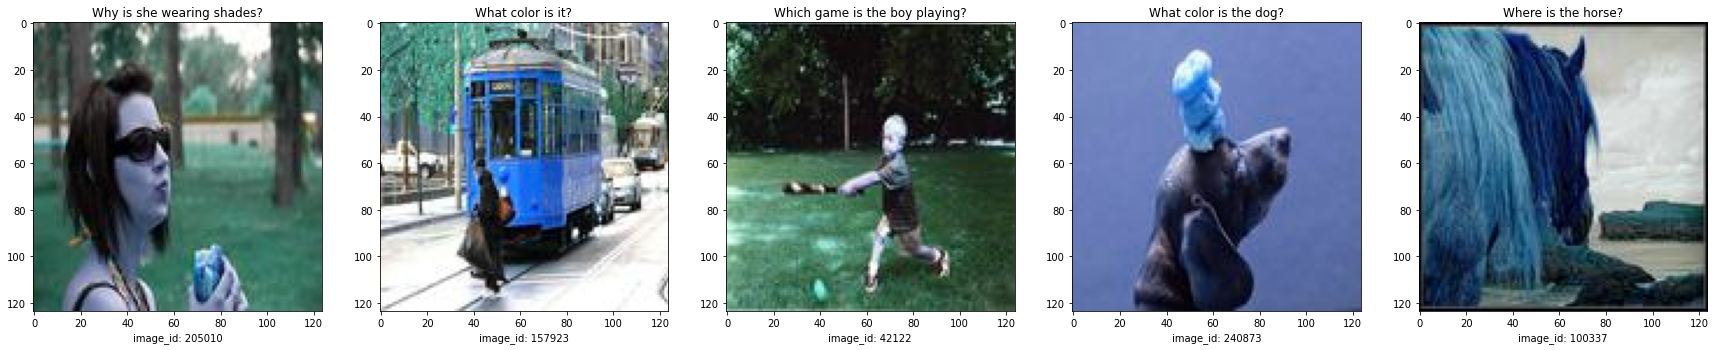

In [ ]:
import json
import random
import matplotlib.pyplot as plt
import cv2

image_question = json.load(open('miniVQA/image_question.json'))
plt.figure(figsize=([30, 20]))

for i in range(5):
  plt.subplot(1, 5, i+1)
  random_image = random.choice(list(image_question.keys()))
  _, random_question = random.choice(image_question[random_image])
  plt.imshow(cv2.resize(cv2.imread('image124/'+random_image+'.jpg'), (124,124)))
  plt.xlabel('image_id: '+random_image)
  plt.title(random_question)

## **Sentence Embedding**

In [ ]:
!pip install sentence_transformers

     |████████████████████████████████| 71kB 3.7MB/s 
     |████████████████████████████████| 1.3MB 6.3MB/s 
     |████████████████████████████████| 2.9MB 14.4MB/s 
     |████████████████████████████████| 1.1MB 34.0MB/s 
     |████████████████████████████████| 890kB 43.8MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.9-cp36-none-any.whl size=101036 sha256=88c6436755c17e1fef802ab74d229a3ba286fab407a1e30432ad2a0042f0aecd
  Stored in directory: /root/.cache/pip/wheels/fc/89/43/f2f5bc00b03ef9724b0f6254a97eaf159a4c4ddc024b33e07a
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=11a8e17eb3d14a19861b922d0eaa9e1f876fc61cf39e44d66eac5ff3faf3f53a
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [ ]:
from sentence_transformers import SentenceTransformer
import time

model = SentenceTransformer('distilbert-base-nli-mean-tokens').cuda() # ne pas toucher

sentences = 'This framework generates embeddings for each input sentence word hello ok'
time_start = time.time()
sentence_embeddings = model.encode(sentences)
print(time.time()-time_start)
print(sentence_embeddings.shape)


100%|██████████| 245M/245M [00:13<00:00, 18.5MB/s]


0.1177530288696289
(768,)


In [ ]:
#IMPORTS
import pandas as pd
import csv
import pprint
import glob
import os
import torch
import torch.nn as nn
from PIL import Image
from torchvision.transforms import *
import numpy as np
import torch.optim as optim
import json
import random
import matplotlib.pyplot as plt
import cv2
import toolz
import heapq
from sentence_transformers import SentenceTransformer


In [ ]:

#label list
labels={}
txt_file = open("miniVQA/answer_list.txt")
i=0
for line in txt_file:
  line=line.rstrip("\n")
  labels[i]=line
  i=i+1
#pprint.pprint(labels)

In [ ]:
#model
model=SentenceTransformer('distilbert-base-nli-mean-tokens').cuda()

In [ ]:
#DataLoader
class Dataset(torch.utils.data.Dataset):
  def __init__(self, split):
    assert split in  ["train", "val","test"]
    self.dataframe=pd.read_csv('miniVQA/'+split+'.csv')
    if split=="train" :
      self.transform = transforms.Compose([
          transforms.RandomResizedCrop(112),
          transforms.RandomHorizontalFlip(),
          transforms.ToTensor(),
      ])
    elif split =="val"or split=="test":
      self.transform = transforms.Compose([
          transforms.Resize((112,112)),
          transforms.ToTensor(),
      ])
    with open('miniVQA/image_question.json') as json_file: 
      self.questions = json.load(json_file)
    self.questionsTransformed={}
    for i in self.questions:
      for q in self.questions[i]:
        self.questionsTransformed[q[0]]=torch.Tensor(model.encode(q[1]))
  def __len__(self):
    return len(self.dataframe.index)
     
  def __getitem__(self, index):
    question_id=self.dataframe.id[index]
    questionTransformed= self.questionsTransformed[question_id]
    image=str(question_id)[:-3]
    img = Image.open('image124/'+image+'.jpg').convert('RGB')
    img = self.transform(img)
    label=self.dataframe.label[index]
    return question_id,questionTransformed,img,label

In [ ]:

train_dataset = Dataset(split="train")
print("Nombre questions pour test", len(train_dataset))
train_generator = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

Nombre questions pour test 50300


In [ ]:
val_dataset = Dataset(split="val")
print("Nombre questions pour val", len(val_dataset))
val_generator = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True)

Nombre questions pour val 6300


In [ ]:
test_dataset=Dataset(split="test")
print("Nbr questions pour test",len(test_dataset))
test_generator = torch.utils.data.DataLoader(test_dataset,batch_size=1, shuffle=False)

Nbr questions pour test 6288


In [ ]:
class Network(nn.Module): 
    def __init__(self, num_classes=None):
        super(Network, self).__init__()
       
        self.features = nn.Sequential(nn.Conv2d( 
            in_channels=3,out_channels=64,kernel_size=11,stride=4,padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3,stride=2),
            nn.Conv2d(in_channels=64,out_channels=192,kernel_size=5,stride=1,padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3,stride=2),
            nn.Conv2d(in_channels=192,out_channels=384,kernel_size=3,stride=1,padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3,stride=2)
            )
        self.classifier = nn.Sequential(
             nn.Linear(1024 +768,512),
             nn.Linear(512,num_classes),
        )


    def forward(self, x: torch.Tensor, question: torch.Tensor):
        x = self.features(x)
        x = torch.flatten(x,1)
        x = torch.cat([x,question],1)
        # x = nn.Dropout(x,p=0.2)
        x = self.classifier(x)
        return x 
   


In [ ]:
#parametres -------------------------------------
learning_rate=1e-4
batch_size=32
num_epochs=125 
#optimisation-----------------------------------------------
loss_func = torch.nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)



In [ ]:
def train(net, batch_size, learning_rate, num_epochs,optimizer,loss_func):
    loss_table=[]
    val_accuracy=[]
    for i in range(num_epochs):
     # scheduler.step()  scheduler mais diminue accuracy
      loss_epoch=[]
      net.train()
      for j, sample in enumerate(train_generator):
        question_id,questionTransformed,img,y = sample
        x = img
        optimizer.zero_grad()
        out = net(x.cuda(), questionTransformed.cuda())
        loss = loss_func(out, y.cuda())
        loss.backward()
        loss_epoch.append(loss.item())
        optimizer.step()
        print('\r Epoch', i, 'Step', j , ':' , str(loss.data.cpu().numpy()), end="")
      net.eval()
      loss_table.append(np.mean(loss_epoch))
      accuracy = []
      best=0
      for j, sample in enumerate(val_generator):
        question_id,questionTransformed,img,label = sample
        out = net(img.cuda(),questionTransformed.cuda())
        best = np.argmax(out.data.cpu().numpy(), axis=-1)
        accuracy.extend(list(best == label.data.cpu().numpy()))
      print('\n val Accuracy is ' , str(np.mean(accuracy)*100))
      val_accuracy.append(np.mean(accuracy)*100)
    print("val done")
    print("to test")
    soumission(net)
    print('plot training loss:',loss_table )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss_table,'b', label='training loss')
    plt.show()
    print('plot val accuracy:',val_accuracy )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot (val_accuracy,'g',label='val accuracy')
    plt.show()

In [ ]:
def soumission(net):
  submission = []
  fields = ['id', 'label']
  for j, sample in enumerate(test_generator):
      question_id,questionTransformed,img,label = sample
      out = net(img.cuda(),questionTransformed.cuda())
      best = np.argmax(out.data.cpu().numpy(), axis=1)
      row = [int(question_id.data.cpu().numpy()[0]), best[0]]
      submission.append(row)
  filename = "submission.csv"
  with open(filename, 'w') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(fields) 
    csvwriter.writerows(submission)

In [ ]:
def isthegood(questionid,best):
  bonnereponse=test_dataset.dataframe.get(questionid)
  return best==bonnereponse

def isInTop5(label,out):
  for val in out.data.cpu().numpy():
    if val == label:
      return true
  return false  

In [ ]:
def save (net,num_epochs,path,loss,optimizer):
  torch.save({
            'epoch': num_epochs,
            'model_state_dict': net.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, path)



In [ ]:
def load(path):
  checkpoint = torch.load(path)
  model=Network()
  model.load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  epoch = checkpoint['epoch']
  loss = checkpoint['loss']
  model.train()
  #or
  #model.eval()


 Epoch 0 Step 785 : 2.4414623
 val Accuracy is  27.61904761904762
 Epoch 1 Step 785 : 2.1898985
 val Accuracy is  31.761904761904763
 Epoch 2 Step 785 : 2.1810606
 val Accuracy is  33.65079365079365
 Epoch 3 Step 785 : 1.7811595
 val Accuracy is  34.0
 Epoch 4 Step 785 : 2.0310812
 val Accuracy is  36.01587301587302
 Epoch 5 Step 785 : 2.0858972
 val Accuracy is  36.492063492063494
 Epoch 6 Step 785 : 1.7734185
 val Accuracy is  37.65079365079365
 Epoch 7 Step 785 : 1.6914774
 val Accuracy is  37.714285714285715
 Epoch 8 Step 785 : 1.8865669
 val Accuracy is  38.46031746031746
 Epoch 9 Step 785 : 1.8366414
 val Accuracy is  38.79365079365079
 Epoch 10 Step 785 : 1.7913257
 val Accuracy is  38.82539682539682
 Epoch 11 Step 785 : 1.5951346
 val Accuracy is  39.904761904761905
 Epoch 12 Step 785 : 1.8662277
 val Accuracy is  39.3968253968254
 Epoch 13 Step 785 : 1.7969953
 val Accuracy is  40.26984126984127
 Epoch 14 Step 785 : 1.6976249
 val Accuracy is  40.0
 Epoch 15 Step 785 : 2.11669

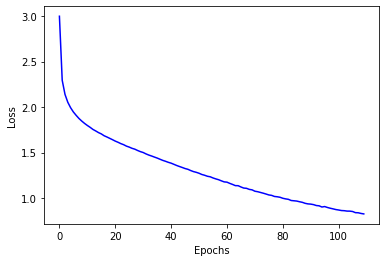

plot val accuracy: [27.61904761904762, 31.761904761904763, 33.65079365079365, 34.0, 36.01587301587302, 36.492063492063494, 37.65079365079365, 37.714285714285715, 38.46031746031746, 38.79365079365079, 38.82539682539682, 39.904761904761905, 39.3968253968254, 40.26984126984127, 40.0, 40.33333333333333, 40.682539682539684, 40.507936507936506, 40.61904761904762, 40.82539682539682, 40.904761904761905, 40.650793650793645, 41.698412698412696, 42.06349206349206, 41.82539682539683, 40.98412698412698, 41.74603174603175, 42.03174603174603, 42.15873015873016, 42.301587301587304, 42.095238095238095, 42.22222222222222, 42.15873015873016, 42.04761904761905, 42.333333333333336, 42.55555555555556, 43.17460317460318, 43.28571428571429, 43.25396825396825, 42.47619047619048, 42.11111111111111, 42.55555555555556, 43.0, 43.0, 43.03174603174603, 42.93650793650794, 42.98412698412699, 42.904761904761905, 43.73015873015873, 43.28571428571429, 44.19047619047619, 43.492063492063494, 43.301587301587304, 43.90476190

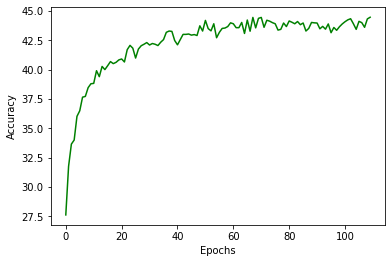

In [ ]:

import torchvision.models as models
path='./result.csv'
net=Network(len(labels)).cuda()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
train(net, batch_size, learning_rate, num_epochs,optimizer,loss_func)

#net = models.resnet152(pretrained=False)
#in_features = net.fc.in_features
#print(in_features)
#net.fc =nn.Linear(in_features,100)
#train(net.cuda(), num_epochs=1)
